In [2]:
import sys
XCr_path = '/Users/aliaksei/Downloads/lume-crystal-bpm'
sys.path.append(XCr_path)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from XCrystal import *
import time

import XCrTools as tools

In [3]:
delta_theta = 0.0
omega0 = 12800

xcr = XCrystal(XCr_path+'/C333.yaml', omega0)
xtools = tools.XCrTools(xcr)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/aliaksei/Downloads/lume-crystal-bpm/C333.yaml'

In [6]:
print('Bragg angle: ', xcr.alphaB * 180 / np.pi)

Bragg angle:  30.48558327729669


In [42]:
tau = 30 * 1e-15
sigma_coh = 0.2 * 1e-15
nmodes = 20
nslice = 200
pseudo_sase_beam = xtools.Pseudo_SASE_3D(xcr, tau, sigma_coh, nmodes, nslice)

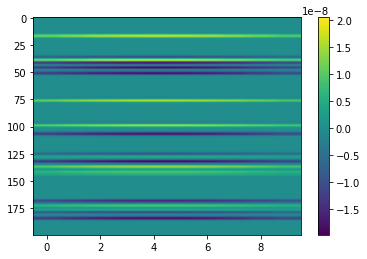

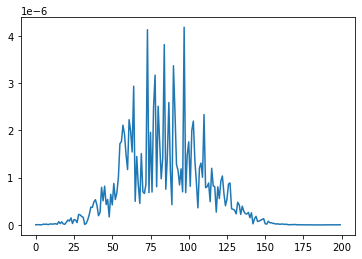

In [43]:
plt.imshow(np.imag(np.sum(pseudo_sase_beam, axis=1)), aspect='auto')
plt.colorbar()
plt.figure()
plt.plot(np.sum(np.abs(np.fft.fftshift(np.fft.fft(pseudo_sase_beam, axis=0),axes=0)), axis=(1,2)))

padded field shape:  (8392, 3200, 10)
Cropped pump field to a new shape (t, x, y):  69 3200 10


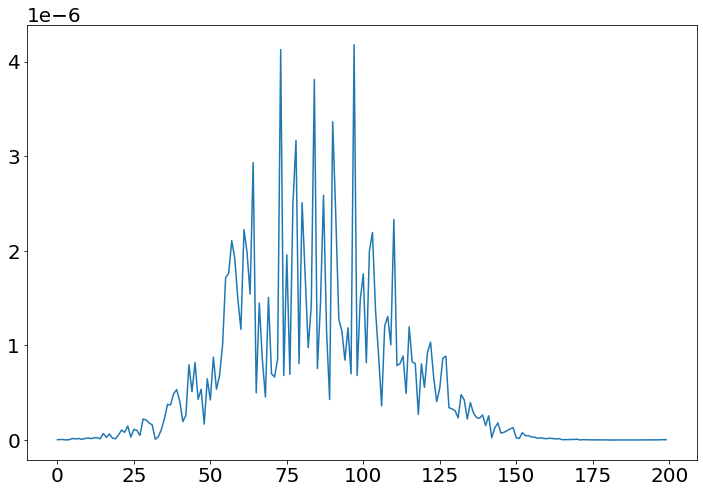

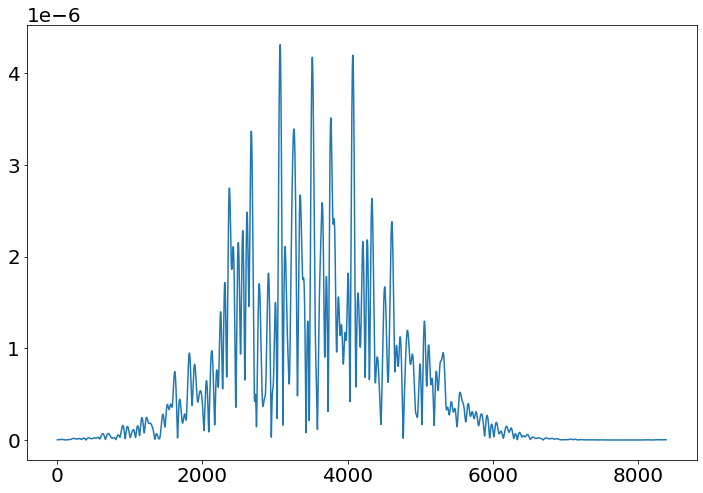

In [70]:
#xcr.dgrid_GenV2 = 1.2e-3
xcr.zsep_GenV2 = 80
    
field = pseudo_sase_beam.copy()

ntc, nxc, nyc = np.shape(field)
tmax = ntc * xcr.lam * xcr.zsep_GenV2 / xcr.c 
dt = tmax/(1.0*ntc)


pad_shape = [(xcr.tpad, xcr.tpad), (0, 0), (0, 0)]
field_padded = xtools.my_pad(field, pad_shape)
coeff = 2.0 * np.pi * xcr.hbar
w = np.fft.fftshift(coeff * np.fft.fftfreq(ntc + 2 * xcr.tpad, dt))
field_fft = np.fft.fftshift(np.fft.fft(field_padded, axis=0), axes=0)
print('padded field shape: ', np.shape(field_fft))
plt.plot(np.sum(np.abs(np.fft.fftshift(np.fft.fft(pseudo_sase_beam, axis=0),axes=0)), axis=(1,2)))
plt.figure()
plt.plot(np.sum(np.abs(field_fft), axis=(1,2)))

t_crop = 120
field_sim = xtools.crop_3d_wavefront(field_fft, cropping_factors=[t_crop, 1, 1])
w_sim = w[int(len(w)/2 - len(w)/t_crop/2):int(len(w)/2 + len(w)/t_crop/2)]

Text(0, 0.5, 'arb.')

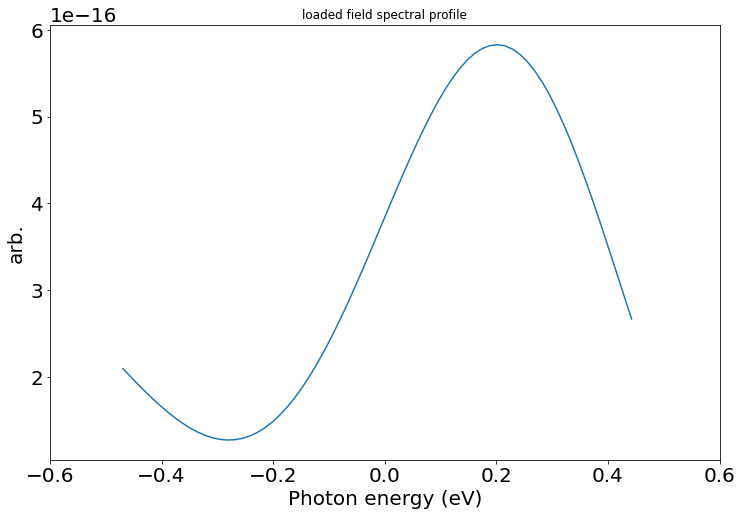

In [71]:
import matplotlib.pyplot as plt
plt.title('loaded field spectral profile')
plt.plot(w_sim, np.sum(np.real(field_sim * np.conj(field_sim)), axis=(1,2)),'-')
plt.xlim(-0.6, 0.6)
plt.xlabel('Photon energy (eV)')
plt.ylabel('arb.')

In [72]:
w_sim

array([-0.46921274, -0.45580666, -0.44240059, -0.42899451, -0.41558843,
       -0.40218235, -0.38877627, -0.37537019, -0.36196412, -0.34855804,
       -0.33515196, -0.32174588, -0.3083398 , -0.29493372, -0.28152765,
       -0.26812157, -0.25471549, -0.24130941, -0.22790333, -0.21449725,
       -0.20109118, -0.1876851 , -0.17427902, -0.16087294, -0.14746686,
       -0.13406078, -0.12065471, -0.10724863, -0.09384255, -0.08043647,
       -0.06703039, -0.05362431, -0.04021824, -0.02681216, -0.01340608,
        0.        ,  0.01340608,  0.02681216,  0.04021824,  0.05362431,
        0.06703039,  0.08043647,  0.09384255,  0.10724863,  0.12065471,
        0.13406078,  0.14746686,  0.16087294,  0.17427902,  0.1876851 ,
        0.20109118,  0.21449725,  0.22790333,  0.24130941,  0.25471549,
        0.26812157,  0.28152765,  0.29493372,  0.3083398 ,  0.32174588,
        0.33515196,  0.34855804,  0.36196412,  0.37537019,  0.38877627,
        0.40218235,  0.41558843,  0.42899451,  0.44240059])

In [73]:
Npoints = len(field_sim)
print(Npoints)
Rs = np.zeros(Npoints)
Ts = np.zeros(Npoints)

69


In [74]:
def single_realization(delta_theta, w_ind):
    
    omega = omega0 + w_sim[w_ind]

    xcr = XCrystal(XCr_path+'/Crystal.yaml', omega)
    xcr.configure(delta_theta, field_sim[w_ind,:,:])
    xcr.run3D()
    
    return xcr.Reflectivity, xcr.Transmission

In [75]:
for i in range(0, Npoints):
    print(' ')
    print('iteration: ', i+1, '  dw: ', w_sim[i])
    Rs[i], Ts[i] = single_realization(delta_theta, i)

 
iteration:  1   dw:  -0.4692127429324969
Quiet mode disabled. I will talk a lot...
Congigured grid parameters
Congigured a Gaussian beam
Congigured deformation model
Splitting recipe: Euler
Initialized tools...
Running with Genesis2 field
Delta theta:  0.0 ; Reflectivity:  0.012545226620571706 ; Transmission:  0.38993310755094457
 
iteration:  2   dw:  -0.45580666456299695
Quiet mode disabled. I will talk a lot...
Congigured grid parameters
Congigured a Gaussian beam
Congigured deformation model
Splitting recipe: Euler
Initialized tools...
Running with Genesis2 field
Delta theta:  0.0 ; Reflectivity:  0.007562967670795422 ; Transmission:  0.39267943983716685
 
iteration:  3   dw:  -0.44240058619349704
Quiet mode disabled. I will talk a lot...
Congigured grid parameters
Congigured a Gaussian beam
Congigured deformation model
Splitting recipe: Euler
Initialized tools...
Running with Genesis2 field
Delta theta:  0.0 ; Reflectivity:  0.017553344035483028 ; Transmission:  0.39018092517019

In [76]:
matplotlib.rcParams['figure.figsize'] = (12,8)
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['legend.fontsize'] = 20

In [79]:
XOPfile = 'Si4009keVThickness50um'
XOPdata = np.loadtxt(XOPfile)

Text(0.5, 0, '$\\Delta \\omega$ (eV)')

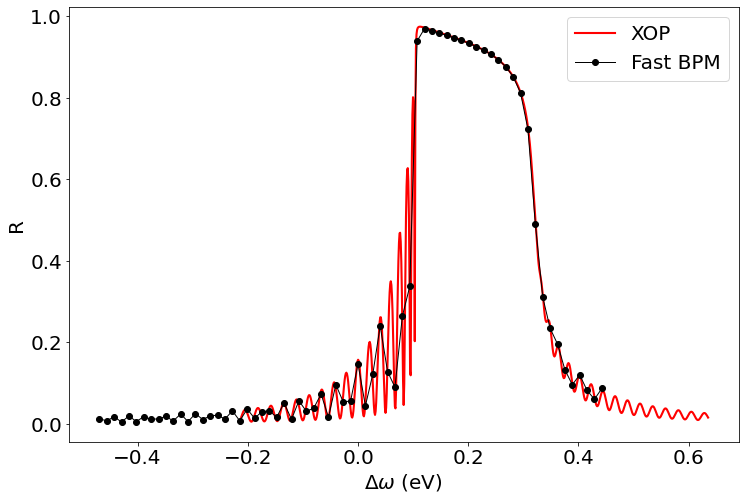

In [81]:
alphaB = 0.5320738025797507
dw = XOPdata[:,0]*4.848137 * 1e-6 * omega0 / np.tan(alphaB)

plt.plot(dw, XOPdata[:,1], '-', linewidth=2.1, color='red', label='XOP')
plt.plot(w_sim, Rs, 'o-', linewidth=1.0, color='black', label='Fast BPM')


plt.legend()
#plt.xlabel(r'$\Delta \theta$ (urad)')
plt.ylabel('R')
plt.xlabel(r'$\Delta \omega$ (eV)')


In [68]:
single_realization(delta_theta, 21)

Quiet mode disabled. I will talk a lot...
Congigured grid parameters
Congigured a Gaussian beam
Congigured deformation model
Splitting recipe: Euler
Initialized tools...
Running with Genesis2 field


KeyboardInterrupt: 

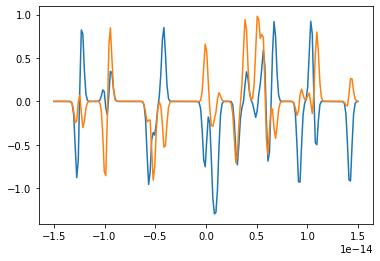

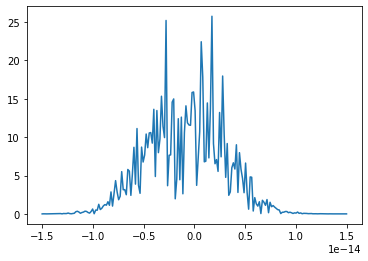

In [7]:
c = 3.0e8
fs = 1.0e-15
tau = 30.0 * fs
Nmodes = 20
sigma_coh = 0.2 * fs
nslice = 200
wavelength = 4.1e-9
omega0 = 2.0 * np.pi * c / wavelength


t0 = np.random.uniform(-tau/2.0, tau/2.0, Nmodes)
t = np.linspace(-tau/2.0, tau/2.0, nslice)


E_sase = np.exp(-(t - t0[0])**2 / 2.0 / sigma_coh**2 - 1j * omega0 * (t - t0[0]))

for i in range(1,Nmodes):
    E_sase += np.exp(-(t - t0[i])**2 / 2.0 / sigma_coh**2 - 1j * omega0 * (t - t0[i]))


plt.figure()
plt.plot(t, np.real(E_sase))
plt.plot(t, np.imag(E_sase))

plt.show()


E_sase_fft = np.fft.fftshift(np.fft.fft(E_sase))
plt.figure()
plt.plot(t, np.abs(E_sase_fft))
plt.show()